# Value at Risk Assessment Model

### Import Packages


In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [2]:
# Number of shares
shares_TCS = 1000

# Live stock price
price = yf.Ticker('TCS.NS')
price_TCS = price.history().tail(1)['Close'].iloc[0]

print(price)
print('---------')
print(price_TCS)

yfinance.Ticker object <TCS.NS>
---------
3451.0


In [3]:
# Investment value
value_TCS = price_TCS * shares_TCS

# Risk free rate (10 year Treasury Rate)
rfr_TCS = 0.035

# Volatility (30-day volatility at that time)
vol_TCS = 0.0127
print(value_TCS)

3451000.0


### Simulations - Calculate Investment Returns

In [4]:
# Number of simulations
simulations = 5000 

# Investment time in a year
t_TCS = 21/252 

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   2.,   4.,   4.,
          4.,   6.,  13.,   7.,  12.,  16.,  13.,  21.,  18.,  23.,  24.,
         43.,  24.,  44.,  50.,  50.,  52.,  58.,  74.,  74.,  99.,  96.,
         99.,  95., 101., 129., 135., 136., 129., 144., 160., 151., 152.,
        161., 157., 160., 172., 156., 156., 131., 129., 100., 122., 114.,
        128., 102., 105., 119.,  81.,  65.,  60.,  61.,  57.,  45.,  50.,
         50.,  33.,  35.,  29.,  23.,  26.,  25.,  22.,  15.,   5.,   9.,
          8.,   4.,   2.,   5.,   1.,   7.,   1.,   0.,   0.,   1.,   0.,
          1.]),
 array([-4.41021219, -4.33214754, -4.25408288, -4.17601823, -4.09795357,
        -4.01988892, -3.94182426, -3.86375961, -3.78569495, -3.70763029,
        -3.62956564, -3.55150098, -3.47343633, -3.39537167, -3.31730702,
        -3.23924236, -3.1611777 , -3.08311305, -3.00504839, -2.92698374,
        -2.84891908, -2.77

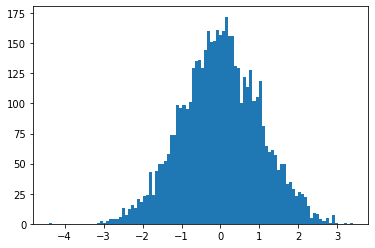

In [5]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample,bins=100)

In [6]:
print(np.mean(sample))
print(np.std(sample))

0.0007489815834777403
1.0059623098038644


In [7]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - .5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_TCS = VaR(value_TCS, rfr_TCS, vol_TCS, t_TCS, simulations)
print(returns_TCS)

[16953.84079045 -3549.10275749 14759.2027027  ... 19125.06389708
 17432.73772522 43101.75537334]


### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [8]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.

x = 0.9
y = price_TCS
print("VaR at {:.0%} confidence level:  ₹{:,.0f}".format(x, y))

VaR at 90% confidence level:  ₹3,451


VaR at 90% confidence level:  ₹-6,121
VaR at 95% confidence level:  ₹-10,507
VaR at 99% confidence level:  ₹-18,081


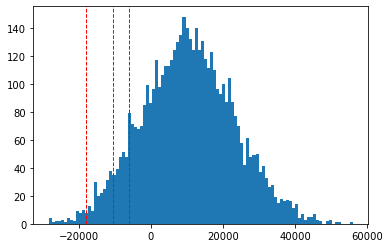

In [9]:
# Plot the returns
plt.hist(returns_TCS, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_TCS, i)
    print("VaR at {:.0%} confidence level:  ₹{:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)